In [1]:
import pymysql.cursors
connection = pymysql.connect(host='localhost',
                                     user='root',
                                     password='XvX-313VC',
                                     db='samlogs',
                                     charset='utf8mb4',
                                     cursorclass=pymysql.cursors.DictCursor,
                                     autocommit=True)

#try: 
with connection.cursor() as cursor:
    print(cursor.execute("SELECT distinct invalid_reason FROM samlogs.directedgraphs"))

project_path = "C:\work\graphs\Code_Clubs\\";
project_folder = "samia_morsecode_03102017";
projectID = '76214924-cd7f-4271-a9f3-ed8fab168e68';
parameters = (projectID,);
#finally:
   # connection.close()

12


In [2]:
with connection.cursor() as cursor:
    cursor.execute("SELECT projectID,stateID,timeCreated,nodeID,nodeName FROM samlogs.nodes WHERE projectID = %s ORDER BY timeCreated", parameters);
    result_nodes = cursor.fetchall();
    print(len(result_nodes));

554


In [3]:
with connection.cursor() as cursor:
    cursor.execute("SELECT DISTINCT nodeName FROM samlogs.nodes WHERE projectID = %s ORDER BY timeCreated", parameters);
    result_dist_nodes = cursor.fetchall();
    print(len(result_dist_nodes));

#node_names_set = set(result_dist_nodes);
node_names_set = set();
for item in result_dist_nodes:
    node_names_set.add(item['nodeName']);

print(node_names_set)

8
{'Keyboard', 'MorseCode', 'Buzzer', 'RGBLED', 'Toggle', 'Player', 'Button', 'Text'}


In [4]:
with connection.cursor() as cursor:
    cursor.execute("SELECT projectID, stateID, fromID, toID, CONCAT(fromID, '->', toID) as fulledge FROM samlogs.edges WHERE projectID = %s ORDER BY timeCreated", parameters);
    result_edges = cursor.fetchall();
    print(len(result_edges));

444


In [5]:
inputs = ['Button', 'Potentiometer', 'Tilt', 'Keyboard', 'LDR', 'TweetIn', 'RotaryPot', 'Pressure', 'IRSensor',
          'Temperature', 'TimeTrigger', 'LightSensor', 'Proximity', 'CarController',
          'TriggerKey', 'TriggerMouse', 'ProcessingIn', 'MidiIn', 'Accelerometer', 'GPS', 'IPhone', 'SensorActorProto', 
          'Joystick'];

outputs = ['RGBLED', 'DCMotor', 'ServoMotor', 'Buzzer', 'Camera', 'Player', 'TweetOut', 'Vibrator', 'Fan', 'TriggerText',
          'iftttOut', 'FacebookOut', 'DigitalOut', 'MidiOut', 'ProcessingOut', 'HueLight', 'Servo', 'Say', 'Drone', 'Nest', 
           'TwoMotors', 'Sonos', 'Tesco', 'AnyIO', 'LeapMotionSwipe', 'LeapMotionPosition', 'LeapMotionHand', 'Sphero', 
           'LeapMotionCircle', 'MqttOut'];

connections =['CodeModule', 'Toggle', 'Counter', 'NumberValue', 'CycleColours', 'Comparator', 'Hold', 'Delay', 'Text', 
              'Filter', 'Inverse', 'LogicAnd', 'Sequencer', 'Interval', 'OnOff', 'Log', 'MorseCode', 'LogicOr', 'Colour',
              'CycleBrightness', 'Direction', 'SwitchDirection', 'LogicNor', 'Relay', 'CycleFrequency', 'LogicXor', 'Note', 
              'LogicNand', 'CycleVolume', 'Threshold', 'Scale', 'Switch',
              'Content', 'Map', 'CloudWifi', 'MotorMovement', 'Cloud', 'MidiMessage', 'Ultrasonic', 'DotMatrix', 'Serial',
              'MIC', 'Inspect', 'StateMachine', 'IMU', 'AmplifyNum'];

print(inputs); print(outputs); print(connections);

['Button', 'Potentiometer', 'Tilt', 'Keyboard', 'LDR', 'TweetIn', 'RotaryPot', 'Pressure', 'IRSensor', 'Temperature', 'TimeTrigger', 'LightSensor', 'Proximity', 'CarController', 'TriggerKey', 'TriggerMouse', 'ProcessingIn', 'MidiIn', 'Accelerometer', 'GPS', 'IPhone', 'SensorActorProto', 'Joystick']
['RGBLED', 'DCMotor', 'ServoMotor', 'Buzzer', 'Camera', 'Player', 'TweetOut', 'Vibrator', 'Fan', 'TriggerText', 'iftttOut', 'FacebookOut', 'DigitalOut', 'MidiOut', 'ProcessingOut', 'HueLight', 'Servo', 'Say', 'Drone', 'Nest', 'TwoMotors', 'Sonos', 'Tesco', 'AnyIO', 'LeapMotionSwipe', 'LeapMotionPosition', 'LeapMotionHand', 'Sphero', 'LeapMotionCircle', 'MqttOut']
['CodeModule', 'Toggle', 'Counter', 'NumberValue', 'CycleColours', 'Comparator', 'Hold', 'Delay', 'Text', 'Filter', 'Inverse', 'LogicAnd', 'Sequencer', 'Interval', 'OnOff', 'Log', 'MorseCode', 'LogicOr', 'Colour', 'CycleBrightness', 'Direction', 'SwitchDirection', 'LogicNor', 'Relay', 'CycleFrequency', 'LogicXor', 'Note', 'LogicNand

In [6]:
edge_names = [];

for edge in result_edges:
    fromNodeID = edge['fromID']; toNodeID = edge['toID'];
    fromNodeName = [item['nodeName'] for item in result_nodes if item['nodeID'] == fromNodeID];
    toNodeName = [item['nodeName'] for item in result_nodes if item['nodeID'] == toNodeID];
    edge = (str(fromNodeName[0]), str(toNodeName[0]));
    edge_names.append(edge);

edge_names_set = set(edge_names);

edge_weights = {};
for edge in edge_names_set:
    edge_weights[edge] = 0; 

for edge in edge_names:
    edge_weights[edge] = edge_weights[edge] + 1;

edge_names_weights = [];
for edge in edge_names_set:
    edge = edge + (edge_weights[edge],);
    edge_names_weights.append(edge);

print(edge_names_set)
print(edge_weights)
print(edge_names_weights)

{('Text', 'Player'), ('Button', 'Text'), ('Toggle', 'Player'), ('MorseCode', 'Toggle'), ('Toggle', 'Text'), ('Button', 'Buzzer'), ('Text', 'Buzzer'), ('Toggle', 'Buzzer'), ('Text', 'RGBLED'), ('Text', 'MorseCode'), ('Text', 'Toggle'), ('Button', 'MorseCode'), ('Toggle', 'RGBLED'), ('Button', 'Toggle'), ('Keyboard', 'Player')}
{('Text', 'Player'): 19, ('Button', 'Text'): 62, ('Toggle', 'Player'): 8, ('MorseCode', 'Toggle'): 65, ('Toggle', 'Text'): 15, ('Button', 'Buzzer'): 1, ('Text', 'Buzzer'): 5, ('Toggle', 'Buzzer'): 67, ('Text', 'RGBLED'): 10, ('Text', 'MorseCode'): 61, ('Text', 'Toggle'): 1, ('Button', 'MorseCode'): 5, ('Toggle', 'RGBLED'): 51, ('Button', 'Toggle'): 69, ('Keyboard', 'Player'): 5}
[('Text', 'Player', 19), ('Button', 'Text', 62), ('Toggle', 'Player', 8), ('MorseCode', 'Toggle', 65), ('Toggle', 'Text', 15), ('Button', 'Buzzer', 1), ('Text', 'Buzzer', 5), ('Toggle', 'Buzzer', 67), ('Text', 'RGBLED', 10), ('Text', 'MorseCode', 61), ('Text', 'Toggle', 1), ('Button', 'Mor

In [7]:
nodes_ico_order = [];
nodes_colour = [];

for node in node_names_set:
    nodes_ico_order.append(node);
    nodes_colour.append('#000000');

input_left = 0; input_right = 0;
output_left = 0; output_right = 0;
conn_left = 0; conn_right = 0;
no_nodes = len(node_names_set);
colour = '#000000';

for node in node_names_set:
    if node in inputs:
        if input_left == input_right:
            pos = int(no_nodes/2) + max(input_left, input_right);
            input_left = input_left + 1;
        else:
            pos = int(no_nodes/2) - max(input_left, input_right);
            input_right = input_right + 1;
        colour = '#B54242';
                    
    if node in outputs:
        if output_left == output_right:
            pos = max(output_left, output_right);
            output_left = output_left + 1;
        else:
            pos = no_nodes - max(output_left, output_right);
            output_right = output_right + 1;
        colour = '#51516F';
            
    if node in connections:
        if conn_left == conn_right:
            pos = int(no_nodes/2) + int((no_nodes/2)/2) - min(conn_left, conn_right);
            conn_left = conn_left + 1;
        else:
            pos = int(no_nodes/2) - int((no_nodes/2)/2) + min(conn_left, conn_right);
            conn_right = conn_right + 1;
        colour = '#F1BD3E';
    
    nodes_ico_order[pos] = node;    
    nodes_colour[pos] = colour;

print(nodes_ico_order);        
print(nodes_colour);  

['Buzzer', 'Player', 'Toggle', 'Button', 'Keyboard', 'Text', 'MorseCode', 'RGBLED']
['#51516F', '#51516F', '#F1BD3E', '#B54242', '#B54242', '#F1BD3E', '#F1BD3E', '#51516F']


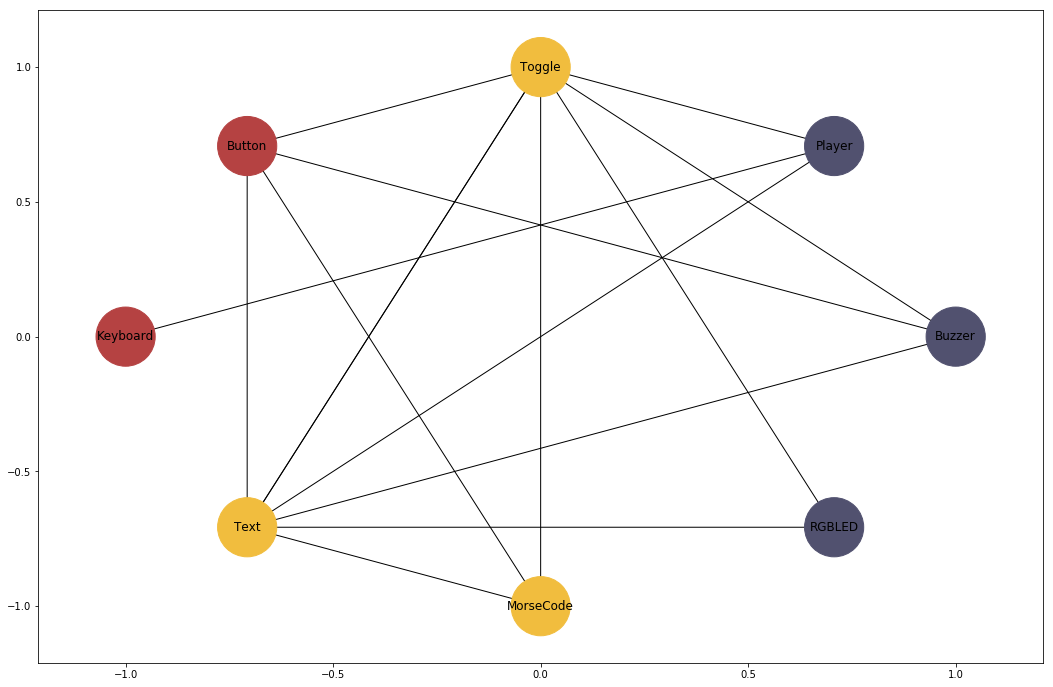

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))

G=nx.DiGraph();
G.add_nodes_from(nodes_ico_order);
G.add_edges_from(edge_names_set);
#G.add_weighted_edges_from(edge_names_weights);

pos=nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=3500, node_color=nodes_colour);
nx.draw_networkx_labels(G, pos);
nx.draw_networkx_edges(G, pos, arrows=True);
#nx.draw_networkx_edge_labels(G, pos, labels = edge_weights);
#nx.draw_networkx_edges(G, pos, arrows=True, width=edge_weights);

#nx.draw(G);
#nx.draw_shell(G);
#nx.draw_circular(G);
## NOT nx.draw_kamada_kawai(G);
## NOT nx.draw_spectral(G);
## NOT nx.draw_spring(G);

image_file = project_path + project_folder + '\\' + 'Blocks used per project' + '.png';
fig.savefig(image_file, bbox_inches = "tight");
plt.show()

In [9]:
with connection.cursor() as cursor:
    cursor.execute("SELECT DISTINCT ID,path_id,path_label,valid,invalid_reason,behaviour,progressing_path_ID FROM samlogs.directedgraphs WHERE projectID = %s", parameters);
    result_circuits = cursor.fetchall();
    print(len(result_circuits))

172


In [10]:
with connection.cursor() as cursor_time:
    cursor_time.execute("SELECT DISTINCT ID, timeCreated, path_id, path_label,progressing_path_ID FROM samlogs.directedgraphs JOIN samlogs.nodes ON directedgraphs.stateID = nodes.stateID WHERE directedgraphs.projectID = %s ORDER BY timeCreated", parameters);
    result_path_time = cursor_time.fetchall();
print(len(result_path_time));
        

172


In [11]:
def get_previous_path_blocks(ID):  

#result_path_time is an ordered list of directedindividualpaths. find the previous path to the given ID
#to identify whether the current path is a subset of its previous state (eg: the input has been removed)
#in order to get the appropriate level at which the block should be placed in the overall graph
#eg: current state is toggle->buzzer, but previous state is button->toggle->buzzer. The toggle should be placed at level2

    level = 1;
    current_path = list(filter(lambda path: path['ID'] == ID, result_path_time));
    id_index = result_path_time.index(current_path[0]);
    blocks_id = result_path_time[id_index]['path_id'];
    blocks_id_list = result_path_time[id_index]['path_id'][2:].split('->');

    if id_index > 0:
        for i in range(id_index-1,0, -1):
            if result_path_time[i]['progressing_path_ID'] == result_path_time[id_index]['progressing_path_ID']:
                previous_blocks_id = result_path_time[i]['path_id'];
                previous_blocks_id_list = result_path_time[i]['path_id'][2:].split('->');
                if previous_blocks_id.find(blocks_id) > 0:
                    new_level = previous_blocks_id_list.index(blocks_id_list[0]) + 1;
                    if new_level > level:
                        level = new_level;                    

    return level;

print(get_previous_path_blocks(150))

4


In [53]:
nodes = {};
nodes_properties = {}; # 'label', 'colour', 'level', 'type', 'pos' = (x,y)
edges = {};
edges_properties = {}; # 'weight' - set as edge width
level = 1;
inconns_per_level = {};
outputs_per_level = {};

for circuit in result_circuits:
    blocks = circuit['path_label'][2:].split('->');
    level = get_previous_path_blocks(circuit['ID']); 
            
    for block in blocks:
        node = str(block) + str(level);
        nodes_properties = {};
        edge_properties = {};

        if node not in nodes.keys():
            nodes_properties['label'] = block;
            if block in inputs:
                nodes_properties['colour'] = '#B54242';
                nodes_properties['type'] = 'input';
                if level in inconns_per_level.keys():
                    inconns_per_level[level] = inconns_per_level[level] + 1;
                else:
                    inconns_per_level[level] = 1;
            if block in outputs:
                nodes_properties['colour'] = '#51516F';
                nodes_properties['type'] = 'output';
                if level in outputs_per_level.keys():
                    outputs_per_level[level] = outputs_per_level[level] + 1;
                else:
                    outputs_per_level[level] = 1;
            if block in connections:
                nodes_properties['colour'] = '#F1BD3E';
                nodes_properties['type'] = 'connection';
                if level in inconns_per_level.keys():
                    inconns_per_level[level] = inconns_per_level[level] + 1;
                else:
                    inconns_per_level[level] = 1;
                    
            nodes_properties['level'] = level;            
            nodes[node] = nodes_properties;
        
        #if past the first node (with no 'in' edge to account for)
        if blocks.index(block) > 0:
            #print('previous_node: ' + previous_node); print('current_node: ' + node);
            edge = (previous_node,node);
            if edge in edges.keys():
                edges[edge]['weight'] = edges[(previous_node,node)]['weight'] + 0.25;
            else:
                edges.update({edge:{'weight': 0.25}});
            
        previous_node = node;
        #increase weight / width of edge     
        level = level + 1;
        
print(nodes); print(edges);    
print(inconns_per_level); print(outputs_per_level);

{'Button1': {'label': 'Button', 'colour': '#B54242', 'type': 'input', 'level': 1}, 'Toggle2': {'label': 'Toggle', 'colour': '#F1BD3E', 'type': 'connection', 'level': 2}, 'Buzzer3': {'label': 'Buzzer', 'colour': '#51516F', 'type': 'output', 'level': 3}, 'RGBLED3': {'label': 'RGBLED', 'colour': '#51516F', 'type': 'output', 'level': 3}, 'Text3': {'label': 'Text', 'colour': '#F1BD3E', 'type': 'connection', 'level': 3}, 'RGBLED4': {'label': 'RGBLED', 'colour': '#51516F', 'type': 'output', 'level': 4}, 'Buzzer4': {'label': 'Buzzer', 'colour': '#51516F', 'type': 'output', 'level': 4}, 'Text2': {'label': 'Text', 'colour': '#F1BD3E', 'type': 'connection', 'level': 2}, 'Toggle3': {'label': 'Toggle', 'colour': '#F1BD3E', 'type': 'connection', 'level': 3}, 'MorseCode3': {'label': 'MorseCode', 'colour': '#F1BD3E', 'type': 'connection', 'level': 3}, 'Toggle4': {'label': 'Toggle', 'colour': '#F1BD3E', 'type': 'connection', 'level': 4}, 'Buzzer5': {'label': 'Buzzer', 'colour': '#51516F', 'type': 'outp

In [54]:
no_nodes_per_level = [];
max_level_node = max(nodes, key=lambda i: nodes[i]['level']);
max_level = nodes[max_level_node]['level'];

# calculate the maximum possible number of nodes that need to be arranged on the x axis so that lists for each level
# can be initiated and populated on different positions at different times, as and when a good position in the list 
# is found - either above the same type of block from the previous level or in the right sequence of input, connection, output
for i in range(1,max_level+1):
    no_nodes = 0;
    if i in inconns_per_level.keys():
        no_nodes = no_nodes + inconns_per_level[i];
    if i in outputs_per_level.keys():
        no_nodes = no_nodes + outputs_per_level[i];
    no_nodes_per_level.append(no_nodes);

# calculate the maximum number of inputs+connections across all levels - that is the threshold from there
# connection blocks start going left, and outputs start going right. even if there are fewer inputs + conns on any given
# level, still start at the maximum number across all levels, for even vertical alignment and getting the connections
# as close together to the outputs as possible at every level.
max_inconns_alllevels = max(inconns_per_level.values());

# initiate each list of lists with empty strings of the maximum possible number of nodes at each level
# so that values can be assigned in the correct position (with potential gaps), same type of blocks on the same vertical 
# lines. if lists not initiated, I can only append to the list, as I'd have to append as well as potentially shuffling
# the already existing blocks in the list backwards or forwards. 
nodes_per_level = [];
for i in range(0,max_level):
    nodes_each_level = [];
    for j in range(0,max(no_nodes_per_level)):
        nodes_each_level.append('');
    nodes_per_level.append(nodes_each_level);

# take each level of the future graph in turn. add the nodes of each level, in the right order, in a list of lists, 
# each list representing a level. From the list they are in (level) and the position in that list (x axis on the level),
# set the pos of each node in the graph.
for i in range(1,max_level+1):
    #print('nodes per level list: '); print(nodes_per_level);
    # in order to keep the same type of nodes in the same vertical lines, for easier intepretation (toggles above toggles)
    # check at each level if there are any blocks of the same type as the previous. if there are, transfer into the same 
    #position as the previous level. 
    for node_key, node_value in nodes.items():
        if node_value['level'] == i:
            if i>1:
                #print('if: ' + node_value[0]['label'] + ' in '); print(nodes_per_level[i-2]);
                for j in range(i-1,0,-1):
                    if node_value['label'] in nodes_per_level[j]:
                        #print('transfer: ' + node_value[0]['label'] + ' on i ' + str(i-1) + ' and j ' + str(nodes_per_level[j].index(node_value[0]['label'])))
                        nodes_per_level[i-1][nodes_per_level[j].index(node_value['label'])] = node_value['label'];
                        break;
    # now that all the nodes of the same type have been allocated the same position in the list at the relevant level,
    # as the positions on the previous level, I can now fill in the gaps with the remaining nodes that were not found on
    # the previous level
    for node_key, node_value in nodes.items():
        if node_value['level'] == i:
            if node_value['label'] not in nodes_per_level[i-1]:
                if node_value['type'] == 'input':
                    for j in range(0,len(nodes_per_level[i-1])):
                        if nodes_per_level[i-1][j] == '':
                            #print('add new input: ' + node_value[0]['label'] + ' on i ' + str(i-1) + ' and j ' + str(j));                    
                            nodes_per_level[i-1][j] = node_value['label'];
                            break;
                if node_value['type'] == 'connection':
                    for j in range(max_inconns_alllevels - 1, -1, -1):
                        if nodes_per_level[i-1][j] == '':
                            #print('add new connection: ' + node_value[0]['label'] + ' on i ' + str(i-1) + ' and j ' + str(j));
                            nodes_per_level[i-1][j] = node_value['label'];
                            break;
                if node_value['type'] == 'output':
                    for j in range(max_inconns_alllevels, max(no_nodes_per_level)):
                        if nodes_per_level[i-1][j] == '':
                            #print('add new output after: ' + node_value[0]['label'] + ' on i ' + str(i-1) + ' and j ' + str(j));
                            nodes_per_level[i-1][j] = node_value['label'];
                            break;
    
print(nodes_per_level);
    

[['Button', 'Keyboard', '', '', '', ''], ['MorseCode', 'Text', 'Toggle', 'Player', 'Buzzer', ''], ['MorseCode', 'Text', 'Toggle', 'Player', 'Buzzer', 'RGBLED'], ['', 'Text', 'Toggle', '', 'Buzzer', 'RGBLED'], ['', '', '', 'Player', 'Buzzer', 'RGBLED']]


In [55]:
for node_key, node_value in nodes.items():
    level = node_value['level'];
    ntype = node_value['label'];
    pos_x = (nodes_per_level[level-1].index(ntype) + 1) * 10;
    pos_y = level * 10;
    pos = (pos_x,pos_y);
    node_value['pos'] = pos;

print(nodes);

{'Button1': {'label': 'Button', 'colour': '#B54242', 'type': 'input', 'level': 1, 'pos': (10, 10)}, 'Toggle2': {'label': 'Toggle', 'colour': '#F1BD3E', 'type': 'connection', 'level': 2, 'pos': (30, 20)}, 'Buzzer3': {'label': 'Buzzer', 'colour': '#51516F', 'type': 'output', 'level': 3, 'pos': (50, 30)}, 'RGBLED3': {'label': 'RGBLED', 'colour': '#51516F', 'type': 'output', 'level': 3, 'pos': (60, 30)}, 'Text3': {'label': 'Text', 'colour': '#F1BD3E', 'type': 'connection', 'level': 3, 'pos': (20, 30)}, 'RGBLED4': {'label': 'RGBLED', 'colour': '#51516F', 'type': 'output', 'level': 4, 'pos': (60, 40)}, 'Buzzer4': {'label': 'Buzzer', 'colour': '#51516F', 'type': 'output', 'level': 4, 'pos': (50, 40)}, 'Text2': {'label': 'Text', 'colour': '#F1BD3E', 'type': 'connection', 'level': 2, 'pos': (20, 20)}, 'Toggle3': {'label': 'Toggle', 'colour': '#F1BD3E', 'type': 'connection', 'level': 3, 'pos': (30, 30)}, 'MorseCode3': {'label': 'MorseCode', 'colour': '#F1BD3E', 'type': 'connection', 'level': 3, 

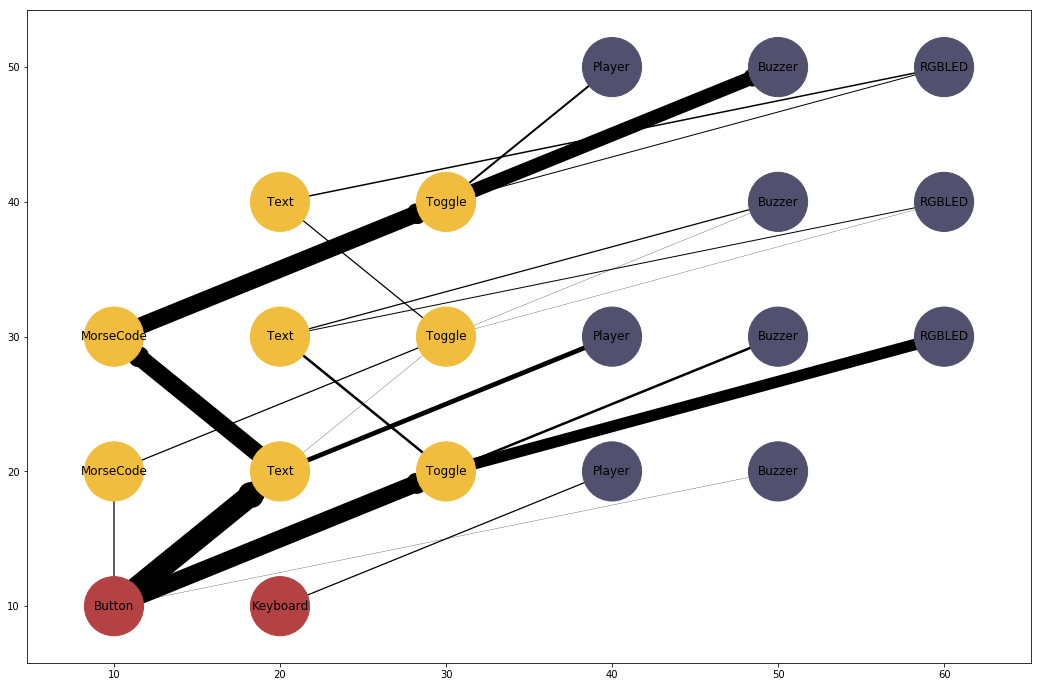

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))

G = nx.DiGraph();
G.add_nodes_from(nodes);
nx.set_node_attributes(G, nodes);
G.add_edges_from(edges);
nx.set_edge_attributes(G, edges);

nodecolordict = nx.get_node_attributes(G,'colour');
nodecolorlist = [];
for key, value in nodecolordict.items():
    nodecolorlist.append(value);

labeldict = nx.get_node_attributes(G,'label');
pos = nx.get_node_attributes(G,'pos');

nx.draw_networkx_nodes(G, pos, node_size=3500, node_color=nodecolorlist);
nx.draw_networkx_labels(G, pos, labels=labeldict, with_labels=True)
nx.draw_networkx_edges(G, pos, width=list(nx.get_edge_attributes(G,'weight').values()));

image_file = project_path + project_folder + '\\' + 'No of uses per edge & blocks per level' + '.png';
fig.savefig(image_file, bbox_inches = "tight");
plt.show()